In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

# Loading data

In [2]:
data = pd.read_csv('CMAPSSData/train_FD001.txt', header=None, sep=' ')
data_test = pd.read_csv('CMAPSSData/test_FD001.txt', header=None, sep=' ')
y_test = pd.read_csv('CMAPSSData/RUL_FD001.txt', header=None)

In [3]:
data = data.drop([26,27], axis= 1)
data_test = data_test.drop([26,27], axis= 1)

In [4]:
sensors = []
for i in np.arange(1,22):
    sensors.append('sensor'+str(i))
data.columns=['asset','cycle','setting1','setting2','setting3']+sensors
data_test.columns=['asset','cycle','setting1','setting2','setting3']+sensors

In [5]:
data.iloc[:,:].head()

,asset,cycle,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [6]:
data_test.head()

,asset,cycle,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [7]:
y_test.head()

,0
0,112
1,98
2,69
3,82
4,91


In [8]:
data.head()

,asset,cycle,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [9]:
data[(data.asset.iloc[1:]-data.asset.iloc[:-1])!=0]

,asset,cycle,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
20630,100,200,-0.0032,-0.0005,100.0,518.67,643.85,1600.38,1432.14,14.62,...,519.30,2388.26,8137.33,8.5036,0.03,396,2388,100.0,38.37,23.0522


In [10]:
t = np.array([0,0,1,1,1,1,3,3])
diffs_a = t[:-1] - t[1:]
diffs_a

array([ 0, -1,  0,  0,  0, -2,  0])

In [11]:
np.append(t[np.where(diffs_a != 0)],t[-1])

array([0, 1, 3])

# EDA

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
asset       20631 non-null int64
cycle       20631 non-null int64
setting1    20631 non-null float64
setting2    20631 non-null float64
setting3    20631 non-null float64
sensor1     20631 non-null float64
sensor2     20631 non-null float64
sensor3     20631 non-null float64
sensor4     20631 non-null float64
sensor5     20631 non-null float64
sensor6     20631 non-null float64
sensor7     20631 non-null float64
sensor8     20631 non-null float64
sensor9     20631 non-null float64
sensor10    20631 non-null float64
sensor11    20631 non-null float64
sensor12    20631 non-null float64
sensor13    20631 non-null float64
sensor14    20631 non-null float64
sensor15    20631 non-null float64
sensor16    20631 non-null float64
sensor17    20631 non-null int64
sensor18    20631 non-null int64
sensor19    20631 non-null float64
sensor20    20631 non-null float64
sensor21    20631 non-nu

In [13]:
print(data.shape)
for i in data.columns:
    print(str(i)+' '+str(data[i].nunique()))
print(data_test.shape)
for i in data_test.columns:
    print(str(i)+' '+str(data_test[i].nunique()))

(20631, 26)
asset 100
cycle 362
setting1 158
setting2 13
setting3 1
sensor1 1
sensor2 310
sensor3 3012
sensor4 4051
sensor5 1
sensor6 2
sensor7 513
sensor8 53
sensor9 6403
sensor10 1
sensor11 159
sensor12 427
sensor13 56
sensor14 6078
sensor15 1918
sensor16 1
sensor17 13
sensor18 1
sensor19 1
sensor20 120
sensor21 4745
(13096, 26)
asset 100
cycle 303
setting1 150
setting2 14
setting3 1
sensor1 1
sensor2 262
sensor3 2361
sensor4 2954
sensor5 1
sensor6 2
sensor7 415
sensor8 41
sensor9 4047
sensor10 1
sensor11 136
sensor12 357
sensor13 43
sensor14 3786
sensor15 1506
sensor16 1
sensor17 9
sensor18 1
sensor19 1
sensor20 103
sensor21 3555


In [14]:
print("There are",data.shape[0],"cycles in the test dataset")
print("Mean no. of cycles for an asset is ",data.groupby('asset')['cycle'].agg(['count','max'])['max'].mean())
data.groupby('asset')['cycle'].agg(['count','max']).T

There are 20631 cycles in the test dataset
Mean no. of cycles for an asset is  206.31


asset,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
count,192,287,179,189,269,188,259,150,201,222,...,135,341,155,258,283,336,202,156,185,200
max,192,287,179,189,269,188,259,150,201,222,...,135,341,155,258,283,336,202,156,185,200


In [15]:
data_test.tail()

,asset,cycle,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699
13095,100,198,0.0013,0.0003,100.0,518.67,642.95,1601.62,1424.99,14.62,...,521.07,2388.05,8214.64,8.4903,0.03,396,2388,100.0,38.70,23.1855


In [16]:
print("I can probably take like last ~15% for validation, it's around",data.shape[0]*.15)
data.groupby('asset')['cycle'].agg(['count','max'])['max'][-14:].sum()

I can probably take like last ~15% for validation, it's around 3094.65


3013

In [17]:
data.iloc[data.shape[0]-3013,:]

asset         87.0000
cycle          1.0000
setting1      -0.0007
setting2      -0.0004
setting3     100.0000
sensor1      518.6700
sensor2      642.6700
sensor3     1595.3300
sensor4     1404.2300
sensor5       14.6200
sensor6       21.6100
sensor7      554.2900
sensor8     2388.0400
sensor9     9060.4500
sensor10       1.3000
sensor11      47.3600
sensor12     522.0700
sensor13    2388.0100
sensor14    8143.6000
sensor15       8.4386
sensor16       0.0300
sensor17     396.0000
sensor18    2388.0000
sensor19     100.0000
sensor20      38.8700
sensor21      23.3231
Name: 17618, dtype: float64

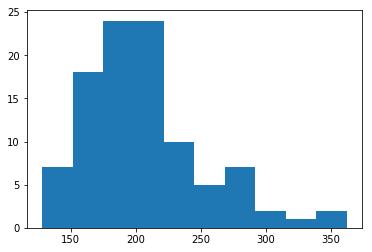

In [18]:
plt.hist(data.groupby('asset')['cycle'].agg(['count','max'])['max']);

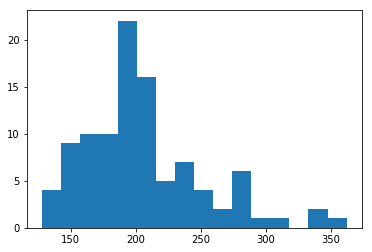

In [19]:
plt.hist(data.groupby('asset')['cycle'].agg(['count','max'])['max'],bins=16);

## Getting info about the no of unique values

In [20]:
for i in data.columns:
    if data[i].nunique()<15:
        print("\t"+str(i)+' '+str(data[i].nunique()))
        print(data[i].unique())
        print(data[i].value_counts())

	setting2 13
[-0.0004 -0.0003  0.0003  0.     -0.0002 -0.0001  0.0001  0.0002  0.0004
  0.0005  0.0006 -0.0005 -0.0006]
-0.0003    2104
 0.0001    2097
 0.0000    2070
 0.0003    2065
-0.0004    2051
-0.0002    2049
 0.0002    2038
-0.0001    2029
 0.0004    1997
 0.0005    1068
-0.0005     958
 0.0006      71
-0.0006      34
Name: setting2, dtype: int64
	setting3 1
[100.]
100.0    20631
Name: setting3, dtype: int64
	sensor1 1
[518.67]
518.67    20631
Name: sensor1, dtype: int64
	sensor5 1
[14.62]
14.62    20631
Name: sensor5, dtype: int64
	sensor6 2
[21.61 21.6 ]
21.61    20225
21.60      406
Name: sensor6, dtype: int64
	sensor10 1
[1.3]
1.3    20631
Name: sensor10, dtype: int64
	sensor16 1
[0.03]
0.03    20631
Name: sensor16, dtype: int64
	sensor17 13
[392 390 393 391 394 396 395 397 398 389 399 388 400]
393    5445
392    4578
394    4063
395    2339
391    2022
396    1185
390     452
397     436
398      72
389      30
399       7
388       1
400       1
Name: sensor17, dtype: int

## Dropping columns with just 1 value

In [21]:
columns_to_drop = []
for i in data.columns:
    if data[i].nunique()==1:
        columns_to_drop.append(i)
columns_to_drop

['setting3',
 'sensor1',
 'sensor5',
 'sensor10',
 'sensor16',
 'sensor18',
 'sensor19']

In [22]:
print("before dropping",data.shape)
data = data.drop(columns_to_drop, axis= 1)
print("after dropping",data.shape)

before dropping (20631, 26)
after dropping (20631, 19)


In [23]:
columns_to_drop = []
for i in data_test.columns:
    if data_test[i].nunique()==1:
        columns_to_drop.append(i)
columns_to_drop

['setting3',
 'sensor1',
 'sensor5',
 'sensor10',
 'sensor16',
 'sensor18',
 'sensor19']

In [24]:
print("before dropping",data_test.shape)
data_test = data_test.drop(columns_to_drop, axis= 1)
print("after dropping",data_test.shape)

before dropping (13096, 26)
after dropping (13096, 19)


## Just some fiddling with graphs

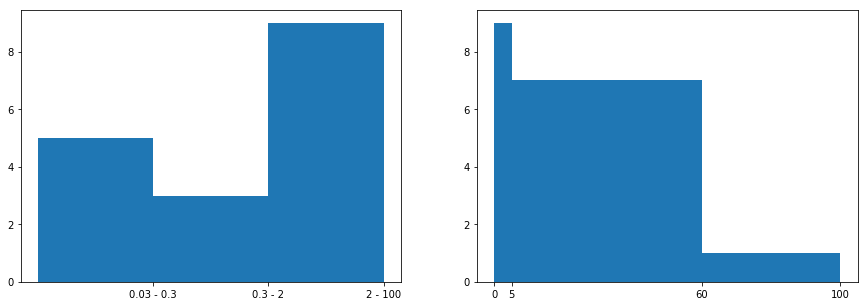

In [25]:
bins = [0.03,0.3,2,100] # your bins
data_f = [0.04,0.07,0.1,0.2,0.2,0.8,1,1.5,4,5,7,8,43,45,54,56,99] # random data

hist, bin_edges = np.histogram(data_f,bins) # make the histogram

fig, ax = plt.subplots(1,2,figsize=(15,5))

# Plot the histogram heights against integers on the x axis
ax[0].bar(range(len(hist)),hist,width=1) 

# Set the ticks to the middle of the bars
ax[0].set_xticks([0.5+i for i,j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax[0].set_xticklabels(['{} - {}'.format(bins[i],bins[i+1]) for i,j in enumerate(hist)])

# Plot the histogram heights against integers on the x axis
ax[1].hist(data_f,bins=[0,5,60,100]) 

# Set the ticks to the middle of the bars
ax[1].set_xticks([0,5,60,100])

# Set the xticklabels to a string that tells us what the bin edges were
#ax[1].set_xticklabels(['{} - {}'.format(bins[i],bins[i+1]) for i,j in enumerate(hist)])

plt.show()

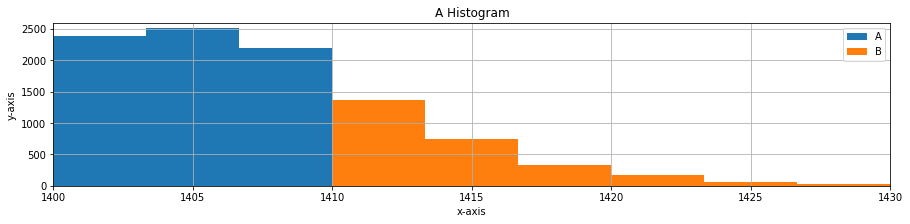

In [26]:
plt.figure(figsize=(15,3))
plt.axis([1400, 1430, 0, 2600])  

# From your example I am assuming that the maximum value is 6000
binBoundaries = np.linspace(1400,1430,10)

data_test[data_test.sensor4 < 1410]['sensor4'].hist(bins=binBoundaries, label='A') 
data_test[data_test.sensor4 >= 1410]['sensor4'].hist(bins=binBoundaries, label='B')

plt.title('A Histogram')  
plt.xlabel('x-axis')  
plt.ylabel('y-axis')  
plt.legend()

No handles with labels found to put in legend.


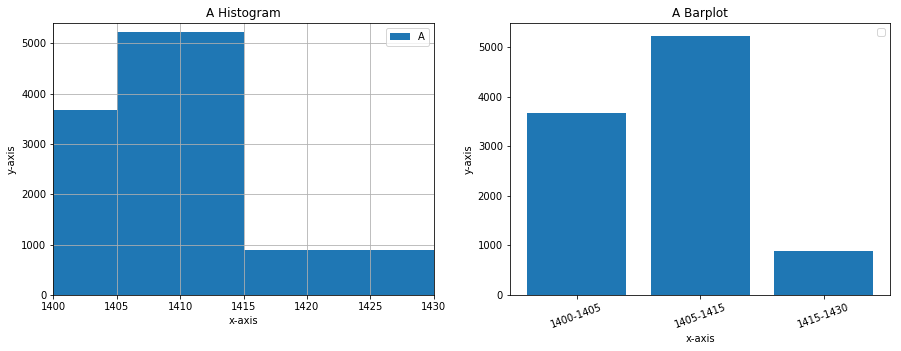

In [27]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.axis([1400, 1430, 0, 5400])  

# From your example I am assuming that the maximum value is 6000
binBoundaries = np.linspace(1400,1430,10)

#data_test['sensor4'].hist(bins=binBoundaries, label='A') 
data_test['sensor4'].hist(bins=[1400,1405,1415,1430], label='A') 

plt.title('A Histogram')  
plt.xlabel('x-axis')  
plt.ylabel('y-axis')  
plt.legend()

plt.subplot(1,2,2)
#plt.axis([1400, 1430, 0, 5400])  
bins = [1400,1405,1415,1430]
hist, bin_edges = np.histogram(data_test['sensor4'],bins) # make the histogram
plt.bar(range(len(hist)),hist) 
plt.title('A Barplot')
plt.xticks(range(len(hist)), ["1400-1405","1405-1415","1415-1430"], rotation=20)
plt.xlabel('x-axis')  
plt.ylabel('y-axis')  
plt.legend()

In [28]:
bins = [1400,1405,1415,1430]
hist, bin_edges = np.histogram(data_test['sensor4'],bins) # make the histogram
hist, bin_edges

(array([3677, 5223,  888], dtype=int64), array([1400, 1405, 1415, 1430]))

In [29]:
range(hist.min())

range(0, 888)

<BarContainer object of 3 artists>

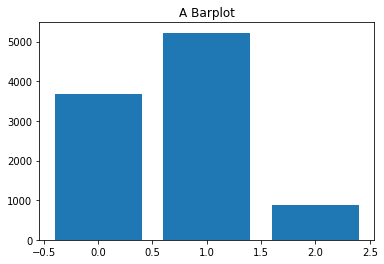

In [30]:
plt.title('A Barplot')  
bins = [1400,1405,1415,1430]
hist, bin_edges = np.histogram(data_test['sensor4'],bins) # make the histogram
plt.bar(range(len(hist)),hist) 


# Making the target

In [31]:
data['TTF'] = data.groupby(['asset'])['cycle'].transform(max)
data['TTF'] = data['TTF']-data['cycle']

In [32]:
data.iloc[190:194,:].head()

,asset,cycle,setting1,setting2,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21,TTF
190,1,191,-0.0000,-0.0004,643.34,1602.36,1425.77,21.61,550.92,2388.28,9042.76,48.15,519.57,2388.30,8114.61,8.5174,394,38.45,23.1295,1
191,1,192,0.0009,-0.0000,643.54,1601.41,1427.20,21.61,551.25,2388.32,9033.22,48.25,520.08,2388.32,8110.93,8.5113,396,38.48,22.9649,0
192,2,1,-0.0018,0.0006,641.89,1583.84,1391.28,21.60,554.53,2388.01,9054.72,46.93,522.33,2388.06,8137.72,8.3905,391,38.94,23.4585,286
193,2,2,0.0043,-0.0003,641.82,1587.05,1393.13,21.61,554.77,2387.98,9051.31,47.24,522.70,2387.98,8131.09,8.4167,392,39.06,23.4085,285


In [33]:
y = pd.DataFrame(data['TTF'],columns=['TTF'])
data = data.drop(['TTF'], axis= 1)

In [34]:
data.head()

,asset,cycle,setting1,setting2,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044


In [35]:
data_test.head()

,asset,cycle,setting1,setting2,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
0,1,1,0.0023,0.0003,643.02,1585.29,1398.21,21.61,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735
1,1,2,-0.0027,-0.0003,641.71,1588.45,1395.42,21.61,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916
2,1,3,0.0003,0.0001,642.46,1586.94,1401.34,21.61,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166
3,1,4,0.0042,0.0000,642.44,1584.12,1406.42,21.61,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737
4,1,5,0.0014,0.0000,642.51,1587.19,1401.92,21.61,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130


## Converting regression to classification

In [36]:
def label_TTF(row):
    r = 'more100'
    if row<=10: r = 'less10'
    if ((row>10)and(row<=50)): r = '10to50'
    if ((row>50)and(row<=100)): r = '50to100'
    return r

In [37]:
data_test.head()

,asset,cycle,setting1,setting2,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
0,1,1,0.0023,0.0003,643.02,1585.29,1398.21,21.61,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735
1,1,2,-0.0027,-0.0003,641.71,1588.45,1395.42,21.61,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916
2,1,3,0.0003,0.0001,642.46,1586.94,1401.34,21.61,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166
3,1,4,0.0042,0.0000,642.44,1584.12,1406.42,21.61,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737
4,1,5,0.0014,0.0000,642.51,1587.19,1401.92,21.61,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130


In [38]:
y_test[0]

0     112
1      98
2      69
3      82
4      91
5      93
6      91
7      95
8     111
9      96
10     97
11    124
12     95
13    107
14     83
15     84
16     50
17     28
18     87
19     16
20     57
21    111
22    113
23     20
24    145
25    119
26     66
27     97
28     90
29    115
     ... 
70    118
71     50
72    131
73    126
74    113
75     10
76     34
77    107
78     63
79     90
80      8
81      9
82    137
83     58
84    118
85     89
86    116
87    115
88    136
89     28
90     38
91     20
92     85
93     55
94    128
95    137
96     82
97     59
98    117
99     20
Name: 0, Length: 100, dtype: int64

In [39]:
y['TTF_'] = y.TTF.apply(lambda x: label_TTF(x))
# assigning real TTF for Y_test since we know the expected results
data_test_maxcycle = data_test.groupby('asset')['cycle'].agg(['count','max'])['max']
y_test_long = pd.DataFrame(data_test.apply(lambda x: data_test_maxcycle.iloc[x['asset'].astype(np.int64)-1]+\
                y_test.iloc[x['asset'].astype(np.int64)-1,:].values[0]-x['cycle'], axis=1),columns=['TTF'])
#pd.DataFrame(data_test.apply(lambda x: y_test.iloc[x['asset'].astype(np.int64)-1,:].values[0]-x['cycle'], axis=1),columns=['TTF'])
y_test[0] = y_test[0].apply(lambda x: label_TTF(x))
y_test_long['TTF_'] = y_test_long['TTF'].apply(lambda x: label_TTF(x))

In [40]:
y_test_long.head()

,TTF,TTF_
0,142.0,more100
1,141.0,more100
2,140.0,more100
3,139.0,more100
4,138.0,more100


In [41]:
#y_test[1] = data_test.groupby('asset')['cycle'].agg(['count','max'])['max']

In [42]:
#data_test.groupby('asset')['cycle'].agg(['count','max'])['max']

In [43]:
data_test.iloc[30:33,:]

,asset,cycle,setting1,setting2,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
30,1,31,-0.0006,0.0004,642.58,1581.22,1398.91,21.61,554.42,2388.08,9056.40,47.23,521.79,2388.06,8130.11,8.4024,393,38.81,23.3552
31,2,1,-0.0009,0.0004,642.66,1589.30,1407.16,21.61,553.14,2388.10,9040.20,47.43,521.62,2388.14,8129.59,8.4283,392,39.00,23.3923
32,2,2,-0.0011,0.0002,642.51,1588.43,1405.47,21.61,553.53,2388.07,9053.77,47.45,522.02,2388.08,8120.05,8.4414,393,38.84,23.2902


In [44]:
y_test_long[30:33]

,TTF,TTF_
30,112.0,more100
31,146.0,more100
32,145.0,more100


In [45]:
y.TTF_.value_counts()

more100    10531
50to100     5000
10to50      4000
less10      1100
Name: TTF_, dtype: int64

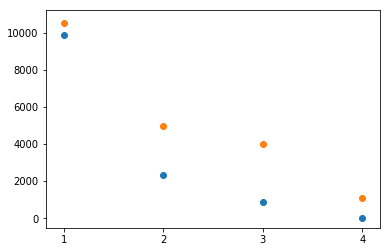

In [46]:
plt.scatter(x=['1','2','3','4'],y=y_test_long.TTF_.value_counts())
plt.scatter(x=['1','2','3','4'],y=y.TTF_.value_counts())

# Preparing train and val data

In [47]:
# leaving last 3013 items (it's 14 assets) for validation
idx = data.shape[0]-3013
idx

17618

In [48]:
data.iloc[:idx,:][['asset','cycle']].tail(2),data.iloc[idx:,:][['asset','cycle']].head(2)

(       asset  cycle
 17616     86    277
 17617     86    278,        asset  cycle
 17618     87      1
 17619     87      2)

In [49]:
data_train = data.iloc[:idx,:]
data_val = data.iloc[idx:,:]
y_train = y[:idx]
y_val = y[idx:]

In [50]:
y_test_long.head()

,TTF,TTF_
0,142.0,more100
1,141.0,more100
2,140.0,more100
3,139.0,more100
4,138.0,more100


In [51]:
data_train.shape,y_train.shape,data_val.shape,y_val.shape

((17618, 19), (17618, 2), (3013, 19), (3013, 2))

In [52]:
data_train.shape,data_test.shape

((17618, 19), (13096, 19))

In [53]:
print(len(y_train),len(y_test),len(y_val))
print(data_train.shape,data_test.shape,data_val.shape)

17618 100 3013
(17618, 19) (13096, 19) (3013, 19)


In [54]:
data_train.head()

,asset,cycle,setting1,setting2,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044


In [55]:
def plot_param(param):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.hist(data_train[param],label='train',normed=True);
    plt.hist(data_val[param],label='val',normed=True,alpha = 0.5);
    plt.legend()
    plt.subplot(1,2,2)
    plt.hist(data_train[param],label='train',normed=True);
    plt.hist(data_test[param],label='test',normed=True,alpha = 0.5);
    plt.legend()

C:\Users\tsar\AppData\Local\conda\conda\envs\py36\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


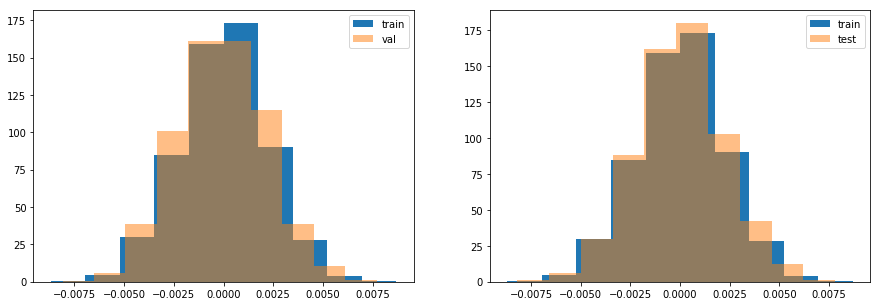

In [56]:
plot_param('setting1')

In [57]:
rng1=None
rng2=slice(2, None)
data_train=data_train.iloc[:rng1,rng2]
data_val=data_val.iloc[:rng1,rng2]
data_test=data_test.iloc[:rng1,rng2]
y_train=y_train[:rng1]
y_val=y_val[:rng1]
y_test_long=y_test_long[:rng1]

In [58]:
#data_train.head(),data_val.head(),data_test.head()

In [59]:
data_train.shape

(17618, 17)

In [60]:
data_train.head()

,setting1,setting2,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
0,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044


# Checking if the test data comes from the same distribution

Trying to predict test data to find out if it's from a different distribution

In [61]:
data.shape, data_test.shape

((20631, 19), (13096, 17))

In [62]:
data.iloc[13091:13095,:]

,asset,cycle,setting1,setting2,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
13091,66,175,-0.0020,-0.0002,643.30,1600.35,1423.58,21.61,552.57,2388.19,9066.12,48.04,519.96,2388.19,8142.13,8.5161,393,38.53,23.1516
13092,66,176,0.0027,-0.0004,643.46,1597.68,1420.84,21.61,552.13,2388.23,9069.49,48.02,520.85,2388.20,8144.80,8.4722,394,38.58,23.1050
13093,66,177,0.0011,0.0002,643.42,1604.56,1419.93,21.61,551.87,2388.21,9072.37,47.93,519.71,2388.20,8143.68,8.5005,395,38.53,23.0751
13094,66,178,0.0023,0.0004,643.72,1595.63,1421.71,21.61,551.96,2388.21,9066.94,48.08,520.44,2388.20,8149.60,8.4975,395,38.61,23.2215


In [63]:
data_test.tail()

,setting1,setting2,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
13091,0.0049,0.0000,643.24,1599.45,1415.79,21.61,553.41,2388.02,9142.37,47.69,520.69,2388.00,8213.28,8.4715,394,38.65,23.1974
13092,-0.0011,-0.0001,643.22,1595.69,1422.05,21.61,553.22,2388.05,9140.68,47.60,521.05,2388.09,8210.85,8.4512,395,38.57,23.2771
13093,-0.0006,-0.0003,643.44,1593.15,1406.82,21.61,553.04,2388.11,9146.81,47.57,521.18,2388.04,8217.24,8.4569,395,38.62,23.2051
13094,-0.0038,0.0001,643.26,1594.99,1419.36,21.61,553.37,2388.07,9148.85,47.61,521.33,2388.08,8220.48,8.4711,395,38.66,23.2699
13095,0.0013,0.0003,642.95,1601.62,1424.99,21.61,552.48,2388.06,9155.03,47.80,521.07,2388.05,8214.64,8.4903,396,38.70,23.1855


In [64]:
data_full = pd.concat([data_train,data_val,data_test]).reset_index(drop=True)

In [65]:
data_full.head()

,setting1,setting2,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
0,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044


In [66]:
data_full.shape

(33727, 17)

In [67]:
y_full = np.zeros(data_full.shape[0])

In [68]:
train_limit = 5000
data_full_train = pd.concat([data_full[:train_limit],data_full[-train_limit:]])
data_full_test = data_full[train_limit:-train_limit]

In [69]:
type(y_full)

numpy.ndarray

In [70]:
y_full[:data.shape[0]]=0
y_full[data.shape[0]:]=1
y_full_train = np.concatenate([y_full[:train_limit],y_full[-train_limit:]])
y_full_test = y_full[train_limit:-train_limit]

In [71]:
data_full.shape, data_full_train.shape,data_full_test.shape, y_full_train.shape, y_full_test.shape

((33727, 17), (10000, 17), (23727, 17), (10000,), (23727,))

In [72]:
np.sum(y_full),np.sum(y_full_train),np.sum(y_full_test)

(13096.0, 5000.0, 8096.0)

In [73]:
from sklearn.linear_model import LogisticRegression
lr_findtest = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter=100)
lr_findtest.fit(data_full_train,y_full_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
lr_findtest.score(data_full_train,y_full_train),lr_findtest.score(data_full_test,y_full_test)

(0.5811, 0.593416782568382)

In [75]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dt_findtest = DecisionTreeClassifier(random_state=0)
dt_findtest.fit(data_full_train,y_full_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [76]:
dt_findtest.score(data_full_train,y_full_train),dt_findtest.score(data_full_test,y_full_test)

(1.0, 0.5225270788553125)

In [77]:
from sklearn.ensemble import RandomForestClassifier
rf_findtest = RandomForestClassifier(random_state=0)
rf_findtest.fit(data_full_train,y_full_train)

C:\Users\tsar\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [78]:
rf_findtest.score(data_full_train,y_full_train),rf_findtest.score(data_full_test,y_full_test)

(0.9844, 0.5561596493446285)

In [79]:
rf_findtest_predict = rf_findtest.predict(data_full_test)

In [80]:
pd.crosstab(y_full_test, rf_findtest_predict)

col_0,0.0,1.0
row_0,,
0.0,9338,6293
1.0,4238,3858


In [81]:
from xgboost import XGBClassifier
xgb_findtest = XGBClassifier(random_state=13)
#eval_set=[(data_train.iloc[:,2:], y_train.TTF_), (data_test.iloc[:,2:], y_test_long.TTF_)],
#early_stopping_rounds=50,  verbose=False
xgb_findtest.fit(data_full_train,y_full_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=13,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [82]:
xgb_findtest.score(data_full_train,y_full_train),xgb_findtest.score(data_full_test,y_full_test)

(0.6754, 0.537151768027985)

In [83]:
xgb_findtest_predict = xgb_findtest.predict(data_full_test)

In [84]:
y_full_test[:15]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [85]:
pd.crosstab(y_full_test, xgb_findtest_predict)

col_0,0.0,1.0
row_0,,
0.0,7200,8431
1.0,2551,5545


In [86]:
y_train.TTF.values,y_test_long.TTF.values

(array([191, 190, 189, ...,   2,   1,   0], dtype=int64),
 array([142., 141., 140., ...,  22.,  21.,  20.]))

Apparently, test data comes from approx. the same distribustion as train / val (since we can't confidently predict if a sample comes from train or test)

# Models

In [87]:
# list with the results of all models
# values are: 
# results_list.append(['lr',[cv_score_train.mean().round(3),cv_score_val.mean().round(3),cv_score_test.mean().round(3)],\
#cv_score.round(3),[conf_train_pct,conf_val_pct,conf_test_pct],\
#                    [scores_train, scores_val,scores_test]])
results_list = []

In [88]:
def get_predicts(clf,data):
    return clf.predict(data)

In [89]:
from sklearn.metrics import f1_score,accuracy_score, roc_auc_score,confusion_matrix

In [90]:
def get_confmatrix(gt,pred):
    conf_matrix = confusion_matrix(gt,pred)
    print('Pct / Total / Diagonal: ', np.round(np.trace(conf_matrix)/np.sum(conf_matrix)*100,2),\
          np.sum(conf_matrix),np.trace(conf_matrix))
    print(conf_matrix)
    return conf_matrix

In [91]:
# returns [f1_score micro,f1_score macro,f1_score weighted,accuracy]
def get_scores(gt,pred):
    return [f1_score(gt,pred,average='micro').round(3),f1_score(gt,pred,average='macro').round(3),\
f1_score(gt,pred,average='weighted').round(3),accuracy_score(gt,pred).round(3)]

## Logistic Regression

Have to scale the data - shouldn't work like this

In [92]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter=100)
lr.fit(data_train,y_train.TTF_)

C:\Users\tsar\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
cv_score_train = cross_val_score(lr,data_train,y_train.TTF_,cv=5)
cv_score_train.mean().round(3),cv_score_train.round(3)

C:\Users\tsar\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\tsar\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\tsar\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\tsar\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\tsar\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\linear_model\log

(0.701, array([0.732, 0.705, 0.737, 0.634, 0.699]))

In [94]:
cv_score_val = cross_val_score(lr,data_val,y_val.TTF_,cv=5)
cv_score_val.mean().round(3),cv_score_val.round(3)

C:\Users\tsar\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\tsar\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\tsar\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\tsar\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\tsar\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\linear_model\log

(0.719, array([0.745, 0.658, 0.706, 0.768, 0.717]))

In [95]:
cv_score_test = cross_val_score(lr,data_test,y_test_long.TTF_,cv=5)
cv_score_test.mean().round(3),cv_score_test.round(3)

C:\Users\tsar\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\tsar\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\tsar\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\tsar\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(0.803, array([0.816, 0.81 , 0.792, 0.821, 0.778]))

In [96]:
predict_lr_train = get_predicts(lr,data_train)
predict_lr_val = get_predicts(lr,data_val)
predict_lr_test = get_predicts(lr,data_test)

In [97]:
conf_train = get_confmatrix(y_train['TTF_'],predict_lr_train)
conf_val = get_confmatrix(y_val['TTF_'],predict_lr_val)
conf_test = get_confmatrix(y_test_long['TTF_'],predict_lr_test)

Pct / Total / Diagonal:  70.8 17618 12474
[[2428  521  160  331]
 [ 652 1556    0 2092]
 [ 418    1  525    2]
 [  99  868    0 7965]]
Pct / Total / Diagonal:  71.46 3013 2153
[[ 361  120   36   43]
 [ 122  264    0  314]
 [  58    0   95    1]
 [  15  151    0 1433]]
Pct / Total / Diagonal:  80.23 13096 10507
[[ 477  209   13  170]
 [ 197  757    0 1354]
 [  13    0    4    0]
 [  78  555    0 9269]]


In [100]:
scores_train = get_scores(y_train['TTF_'],predict_lr_train)
scores_val = get_scores(y_val['TTF_'],predict_lr_val)
scores_test = get_scores(y_test_long['TTF_'],predict_lr_test)
print(scores_train)
print(scores_val)
print(scores_test)

[0.708, 0.647, 0.692, 0.708]
[0.715, 0.647, 0.702, 0.715]
[0.802, 0.528, 0.786, 0.802]


In [101]:
conf_train_pct = np.round(np.trace(conf_train)/np.sum(conf_train)*100,2)
conf_val_pct = np.round(np.trace(conf_val)/np.sum(conf_val)*100,2)
conf_test_pct = np.round(np.trace(conf_test)/np.sum(conf_test)*100,2)
results_list.append(['lr',[cv_score_train.mean().round(3),cv_score_val.mean().round(3),cv_score_test.mean().round(3)],\
                     cv_score_test.round(3),[conf_train_pct,conf_val_pct,conf_test_pct],\
                    [scores_train, scores_val,scores_test]])

## DT

In [102]:
data_train.head()

,setting1,setting2,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
0,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044


In [103]:
data_val.head()

,setting1,setting2,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
17618,-0.0007,-0.0004,642.67,1595.33,1404.23,21.61,554.29,2388.04,9060.45,47.36,522.07,2388.01,8143.60,8.4386,396,38.87,23.3231
17619,-0.0004,-0.0005,642.43,1587.74,1411.71,21.61,553.91,2388.03,9065.16,47.44,521.81,2388.03,8141.40,8.4433,393,38.94,23.3576
17620,0.0042,0.0005,642.88,1584.10,1399.03,21.61,554.26,2388.04,9064.45,47.35,522.07,2388.03,8142.93,8.4248,393,38.96,23.2546
17621,0.0020,0.0004,642.27,1587.90,1397.49,21.61,552.91,2388.03,9059.79,47.28,521.97,2388.05,8147.70,8.4458,392,38.88,23.3086
17622,0.0009,0.0005,642.45,1585.48,1405.60,21.61,553.25,2388.05,9060.30,47.35,522.13,2388.06,8143.75,8.4194,392,38.99,23.3682


In [104]:
data_test.head()

,setting1,setting2,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
0,0.0023,0.0003,643.02,1585.29,1398.21,21.61,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735
1,-0.0027,-0.0003,641.71,1588.45,1395.42,21.61,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916
2,0.0003,0.0001,642.46,1586.94,1401.34,21.61,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166
3,0.0042,0.0000,642.44,1584.12,1406.42,21.61,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737
4,0.0014,0.0000,642.51,1587.19,1401.92,21.61,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130


In [105]:
y_train[:5]

,TTF,TTF_
0,191,more100
1,190,more100
2,189,more100
3,188,more100
4,187,more100


In [106]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(data_train,y_train.TTF_)
#cross_val_score(clf, iris.data, iris.target, cv=10)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [107]:
cv_score_train = cross_val_score(dt,data_train,y_train.TTF_,cv=5)
cv_score_train.mean().round(3),cv_score_train.round(3)

(0.66, array([0.706, 0.654, 0.683, 0.616, 0.642]))

In [108]:
cv_score_val = cross_val_score(dt,data_val,y_val.TTF_,cv=5)
cv_score_val.mean().round(3),cv_score_val.round(3)

(0.624, array([0.683, 0.6  , 0.556, 0.638, 0.641]))

In [109]:
cv_score_test = cross_val_score(dt,data_test,y_test_long.TTF_,cv=5)
cv_score_test.mean().round(3),cv_score_test.round(3)

(0.735, array([0.763, 0.733, 0.732, 0.75 , 0.7  ]))

In [110]:
predict_dt_train = get_predicts(dt,data_train)
predict_dt_val = get_predicts(dt,data_val)
predict_dt_test = get_predicts(dt,data_test)

In [111]:
conf_train = get_confmatrix(y_train['TTF_'],predict_dt_train)
conf_val = get_confmatrix(y_val['TTF_'],predict_dt_val)
conf_test = get_confmatrix(y_test_long['TTF_'],predict_dt_test)

Pct / Total / Diagonal:  100.0 17618 17618
[[3440    0    0    0]
 [   0 4300    0    0]
 [   0    0  946    0]
 [   0    0    0 8932]]
Pct / Total / Diagonal:  66.08 3013 1991
[[ 345  134   34   47]
 [ 121  297    0  282]
 [  44    0  110    0]
 [  30  330    0 1239]]
Pct / Total / Diagonal:  72.0 13096 9429
[[ 476  273   20  100]
 [ 224  993    0 1091]
 [  10    0    7    0]
 [ 172 1777    0 7953]]


In [112]:
scores_train = get_scores(y_train['TTF_'],predict_dt_train)
scores_val = get_scores(y_val['TTF_'],predict_dt_val)
scores_test = get_scores(y_test_long['TTF_'],predict_dt_test)
print(scores_train)
print(scores_val)
print(scores_test)

[1.0, 1.0, 1.0, 1.0]
[0.661, 0.639, 0.664, 0.661]
[0.72, 0.517, 0.733, 0.72]


In [113]:
conf_train_pct = np.round(np.trace(conf_train)/np.sum(conf_train)*100,2)
conf_val_pct = np.round(np.trace(conf_val)/np.sum(conf_val)*100,2)
conf_test_pct = np.round(np.trace(conf_test)/np.sum(conf_test)*100,2)
results_list.append(['dt',[cv_score_train.mean().round(3),cv_score_val.mean().round(3),cv_score_test.mean().round(3)],\
                     cv_score_test.round(3),[conf_train_pct,conf_val_pct,conf_test_pct],\
                    [scores_train, scores_val,scores_test]])

## RandomForest

In [114]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0) # , n_estimators=10, min_samples_leaf=5, max_depth=25
rf.fit(data_train,y_train.TTF_)

C:\Users\tsar\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [115]:
cv_score_train = cross_val_score(rf,data_train,y_train.TTF_,cv=5)
cv_score_train.mean().round(3),cv_score_train.round(3)

(0.728, array([0.771, 0.719, 0.764, 0.662, 0.725]))

In [116]:
cv_score_val = cross_val_score(rf,data_val,y_val.TTF_,cv=5)
cv_score_val.mean().round(3),cv_score_val.round(3)

(0.681, array([0.735, 0.632, 0.617, 0.697, 0.727]))

In [117]:
cv_score_test = cross_val_score(rf,data_test,y_test_long.TTF_,cv=5)
cv_score_test.mean().round(3),cv_score_test.round(3)

(0.809, array([0.83 , 0.788, 0.814, 0.83 , 0.784]))

In [118]:
predict_rf_train = get_predicts(rf,data_train)
predict_rf_val = get_predicts(rf,data_val)
predict_rf_test = get_predicts(rf,data_test)

In [119]:
conf_train = get_confmatrix(y_train['TTF_'],predict_rf_train)
conf_val = get_confmatrix(y_val['TTF_'],predict_rf_val)
conf_test = get_confmatrix(y_test_long['TTF_'],predict_rf_test)

Pct / Total / Diagonal:  99.06 17618 17453
[[3422    7    3    8]
 [  37 4210    0   53]
 [  16    0  930    0]
 [   1   40    0 8891]]
Pct / Total / Diagonal:  72.45 3013 2183
[[ 414  100   13   33]
 [ 104  305    0  291]
 [  41    0  113    0]
 [   5  243    0 1351]]
Pct / Total / Diagonal:  79.78 13096 10448
[[ 550  215    5   99]
 [ 171  924    0 1213]
 [  11    0    6    0]
 [  39  895    0 8968]]


In [120]:
scores_train = get_scores(y_train['TTF_'],predict_rf_train)
scores_val = get_scores(y_val['TTF_'],predict_rf_val)
scores_test = get_scores(y_test_long['TTF_'],predict_rf_test)
print(scores_train)
print(scores_val)
print(scores_test)

[0.991, 0.989, 0.991, 0.991]
[0.725, 0.705, 0.721, 0.725]
[0.798, 0.603, 0.792, 0.798]


In [121]:
conf_train_pct = np.round(np.trace(conf_train)/np.sum(conf_train)*100,2)
conf_val_pct = np.round(np.trace(conf_val)/np.sum(conf_val)*100,2)
conf_test_pct = np.round(np.trace(conf_test)/np.sum(conf_test)*100,2)
results_list.append(['rf',[cv_score_train.mean().round(3),cv_score_val.mean().round(3),cv_score_test.mean().round(3)],\
                     cv_score_test.round(3),[conf_train_pct,conf_val_pct,conf_test_pct],\
                    [scores_train, scores_val,scores_test]])

In [122]:
rf.classes_

array(['10to50', '50to100', 'less10', 'more100'], dtype=object)

## XGB

In [123]:
#np.unique(y.TTF_)

In [124]:
#from sklearn.utils import class_weight
#class_weights = list(class_weight.compute_class_weight('balanced',
#                                             np.unique(y.TTF_),
#                                             y.TTF_))

#w_array = np.ones(y.TTF_.shape[0], dtype = 'float')
#for i, val in enumerate(y.TTF_):
#    w_array[i] = class_weights[val-1]

In [125]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
#eval_set=[(data_train.iloc[:,2:], y_train.TTF_), (data_test.iloc[:,2:], y_test_long.TTF_)],
#early_stopping_rounds=50,  verbose=False
xgb.fit(data_train, y_train.TTF_) # , sample_weight=w_array

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [126]:
cv_score_train = cross_val_score(xgb,data_train,y_train.TTF_,cv=5)
cv_score_train.mean().round(3),cv_score_train.round(3)

(0.758, array([0.788, 0.745, 0.795, 0.708, 0.752]))

In [127]:
cv_score_val = cross_val_score(xgb,data_val,y_val.TTF_,cv=5)
cv_score_val.mean().round(3),cv_score_val.round(3)

(0.715, array([0.778, 0.663, 0.652, 0.75 , 0.734]))

In [128]:
cv_score_test = cross_val_score(xgb,data_test,y_test_long.TTF_,cv=5)
cv_score_test.mean().round(3),cv_score_test.round(3)

(0.826, array([0.839, 0.823, 0.822, 0.838, 0.809]))

In [129]:
predict_xgb_train = get_predicts(xgb,data_train)
predict_xgb_val = get_predicts(xgb,data_val)
predict_xgb_test = get_predicts(xgb,data_test)

In [130]:
conf_train = get_confmatrix(y_train['TTF_'],predict_xgb_train)
conf_val = get_confmatrix(y_val['TTF_'],predict_xgb_val)
conf_test = get_confmatrix(y_test_long['TTF_'],predict_xgb_test)

Pct / Total / Diagonal:  79.33 17618 13976
[[2757  399  108  176]
 [ 409 1962    0 1929]
 [ 129    0  817    0]
 [   6  486    0 8440]]
Pct / Total / Diagonal:  75.64 3013 2279
[[ 407   99   13   41]
 [  85  273    0  342]
 [  35    0  119    0]
 [   1  118    0 1480]]
Pct / Total / Diagonal:  83.32 13096 10911
[[ 549  197    9  114]
 [ 141  794    0 1373]
 [   9    0    8    0]
 [  21  321    0 9560]]


In [131]:
scores_train = get_scores(y_train['TTF_'],predict_xgb_train)
scores_val = get_scores(y_val['TTF_'],predict_xgb_val)
scores_test = get_scores(y_test_long['TTF_'],predict_xgb_test)
print(scores_train)
print(scores_val)
print(scores_test)

[0.793, 0.777, 0.78, 0.793]
[0.756, 0.724, 0.742, 0.756]
[0.833, 0.628, 0.814, 0.833]


In [132]:
conf_train_pct = np.round(np.trace(conf_train)/np.sum(conf_train)*100,2)
conf_val_pct = np.round(np.trace(conf_val)/np.sum(conf_val)*100,2)
conf_test_pct = np.round(np.trace(conf_test)/np.sum(conf_test)*100,2)
results_list.append(['xgb',[cv_score_train.mean().round(3),cv_score_val.mean().round(3),cv_score_test.mean().round(3)],\
                     cv_score_test.round(3),[conf_train_pct,conf_val_pct,conf_test_pct],\
                    [scores_train, scores_val,scores_test]])

In [133]:
#[0.793, 0.777, 0.78, 0.793]
#[0.756, 0.724, 0.742, 0.756]
#[0.833, 0.628, 0.814, 0.833]

In [134]:
data_test[:10]

,setting1,setting2,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
0,0.0023,0.0003,643.02,1585.29,1398.21,21.61,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735
1,-0.0027,-0.0003,641.71,1588.45,1395.42,21.61,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916
2,0.0003,0.0001,642.46,1586.94,1401.34,21.61,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166
3,0.0042,0.0000,642.44,1584.12,1406.42,21.61,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737
4,0.0014,0.0000,642.51,1587.19,1401.92,21.61,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130
5,0.0012,0.0003,642.11,1579.12,1395.13,21.61,554.22,2388.00,9050.96,47.26,521.92,2388.08,8127.46,8.4238,392,38.91,23.3467
6,-0.0000,0.0002,642.11,1583.34,1404.84,21.61,553.89,2388.05,9051.39,47.31,522.01,2388.06,8134.97,8.3914,391,38.85,23.3952
7,0.0006,-0.0000,642.54,1580.89,1400.89,21.61,553.59,2388.05,9052.86,47.21,522.09,2388.06,8125.93,8.4213,393,39.05,23.3224
8,-0.0036,0.0000,641.88,1593.29,1412.28,21.61,554.49,2388.06,9048.55,47.37,522.03,2388.05,8134.15,8.4353,391,39.10,23.4521
9,-0.0025,-0.0001,642.07,1585.25,1398.64,21.61,554.28,2388.04,9051.95,47.14,522.00,2388.06,8134.08,8.4093,391,38.87,23.3820


In [135]:
xgb.classes_

array(['10to50', '50to100', 'less10', 'more100'], dtype=object)

In [136]:
# use y_test_long['TTF_'][2400:2450],predict_xgb_test[2400:2450] to get a small but representative example
get_confmatrix(y_test_long['TTF_'],predict_xgb_test)

Pct / Total / Diagonal:  83.32 13096 10911
[[ 549  197    9  114]
 [ 141  794    0 1373]
 [   9    0    8    0]
 [  21  321    0 9560]]


array([[ 549,  197,    9,  114],
       [ 141,  794,    0, 1373],
       [   9,    0,    8,    0],
       [  21,  321,    0, 9560]], dtype=int64)

In [137]:
pd.crosstab(y_test_long['TTF_'][2400:2450].values, predict_xgb_test[2400:2450], rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,10to50,50to100,less10,more100,All
Actual,,,,,
10to50,18,16,1,0,35
more100,0,0,0,15,15
All,18,16,1,15,50


Some notes regarding the confusion matrix...<br/>We have 197 50to100 and 114 more100 when actual RUL is 10 to 50, which means that we are too positive regarding the RUL which may lead to failure earlier than predicted.

In [138]:
y_test_long['TTF_'][2400:2450].values

array(['10to50', '10to50', '10to50', '10to50', '10to50', '10to50',
       '10to50', '10to50', '10to50', '10to50', '10to50', '10to50',
       '10to50', '10to50', '10to50', '10to50', '10to50', '10to50',
       '10to50', '10to50', '10to50', '10to50', '10to50', '10to50',
       '10to50', '10to50', '10to50', '10to50', '10to50', '10to50',
       '10to50', '10to50', '10to50', '10to50', '10to50', 'more100',
       'more100', 'more100', 'more100', 'more100', 'more100', 'more100',
       'more100', 'more100', 'more100', 'more100', 'more100', 'more100',
       'more100', 'more100'], dtype=object)

In [139]:
predict_xgb_test[2400:2450]

array(['50to100', '50to100', '50to100', '50to100', '50to100', '50to100',
       '10to50', '50to100', '50to100', '50to100', '50to100', '50to100',
       '10to50', '50to100', '50to100', '50to100', '50to100', '50to100',
       '10to50', '10to50', '10to50', '10to50', '10to50', '10to50',
       '10to50', '10to50', '10to50', '10to50', '10to50', '10to50',
       '10to50', '10to50', '10to50', 'less10', '10to50', 'more100',
       'more100', 'more100', 'more100', 'more100', 'more100', 'more100',
       'more100', 'more100', 'more100', 'more100', 'more100', 'more100',
       'more100', 'more100'], dtype=object)

## XGB Regression

In [140]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [141]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
xgbr = XGBRegressor()
#eval_set=[(data_train.iloc[:,2:], y_train.TTF_), (data_test.iloc[:,2:], y_test_long.TTF_)],
#early_stopping_rounds=50,  verbose=False
xgbr.fit(data_train, y_train.TTF)

[16:58:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\tsar\AppData\Local\conda\conda\envs\py36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\tsar\AppData\Local\conda\conda\envs\py36\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [142]:
predict_xgbr_train = get_predicts(xgbr,data_train)
predict_xgbr_val = get_predicts(xgbr,data_val)
predict_xgbr_test = get_predicts(xgbr,data_test)

In [143]:
np.sqrt(mean_squared_error(y_train.TTF,predict_xgbr_train)),np.sqrt(mean_squared_error(y_val.TTF,predict_xgbr_val)),\
np.sqrt(mean_squared_error(y_test_long.TTF,predict_xgbr_test))

(38.407046793218164, 51.89746057981903, 45.71892335760576)

In [144]:
mean_absolute_error(y_train.TTF,predict_xgbr_train),mean_absolute_error(y_val.TTF,predict_xgbr_val),\
mean_absolute_error(y_test_long.TTF,predict_xgbr_test)

(27.3297600680792, 37.29845203860353, 34.33775893296129)

In [145]:
mean_absolute_percentage_error(y_train.TTF,predict_xgbr_train),mean_absolute_percentage_error(y_val.TTF,predict_xgbr_val),\
mean_absolute_percentage_error(y_test_long.TTF,predict_xgbr_test)

(inf, inf, 28.228534032141695)

In [146]:
#print(y_train[:192]['TTF'].values)
#print(predict_xgbr_train[:192])

In [147]:
#get_confmatrix(y_train['TTF_'],predict_xgb_train)
#get_confmatrix(y_val['TTF_'],predict_xgb_val)
#get_confmatrix(y_test_long['TTF_'],predict_xgb_test)

In [148]:
#print(get_scores(y_train['TTF_'],predict_xgb_train))
#print(get_scores(y_val['TTF_'],predict_xgb_val))
#print(get_scores(y_test_long['TTF_'],predict_xgb_test))

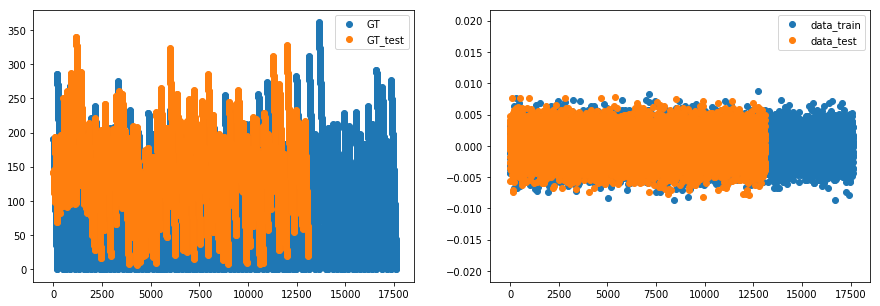

In [149]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(np.arange(0,y_train.shape[0]),y_train.TTF,label='GT')
#plt.scatter(np.arange(0,len(predict_xgbr_train)),predict_xgbr_train,alpha=0.5,label='predict')
plt.scatter(np.arange(0,y_test_long.shape[0]),y_test_long.TTF,label='GT_test')
#plt.scatter(np.arange(0,len(predict_xgbr_test)),predict_xgbr_test,alpha=0.5,label='predict_test')
plt.legend()
plt.subplot(1,2,2)
plt.scatter(np.arange(0,data_train.shape[0]),data_train[data_train.columns[0]],label='data_train')
plt.scatter(np.arange(0,data_test.shape[0]),data_test[data_train.columns[0]],label='data_test')
plt.legend()

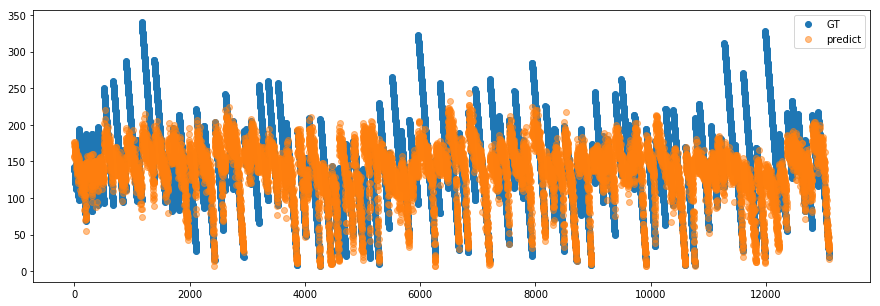

In [150]:
plt.figure(figsize=(15,5))
plt.scatter(np.arange(0,y_test_long.shape[0]),y_test_long.TTF,label='GT')
plt.scatter(np.arange(0,len(predict_xgbr_test)),predict_xgbr_test,alpha=0.5,label='predict')
plt.legend()

## kNN

In [151]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(data_train, y_train.TTF_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [152]:
cv_score_train = cross_val_score(knn,data_train,y_train.TTF_,cv=5)
cv_score_train.mean().round(3),cv_score_train.round(3)

(0.683, array([0.724, 0.676, 0.7  , 0.641, 0.673]))

In [153]:
cv_score_val = cross_val_score(knn,data_val,y_val.TTF_,cv=5)
cv_score_val.mean().round(3),cv_score_val.round(3)

(0.656, array([0.682, 0.61 , 0.624, 0.698, 0.667]))

In [154]:
cv_score_test = cross_val_score(knn,data_test,y_test_long.TTF_,cv=5)
cv_score_test.mean().round(3),cv_score_test.round(3)

(0.785, array([0.8  , 0.779, 0.78 , 0.807, 0.761]))

In [155]:
predict_knn_train = get_predicts(knn,data_train)
predict_knn_val = get_predicts(knn,data_val)
predict_knn_test = get_predicts(knn,data_test)

In [156]:
conf_train = get_confmatrix(y_train['TTF_'],predict_knn_train);
conf_val = get_confmatrix(y_val['TTF_'],predict_knn_val);
conf_test = get_confmatrix(y_test_long['TTF_'],predict_knn_test);

Pct / Total / Diagonal:  78.66 17618 13858
[[2725  409  138  168]
 [ 457 2363    0 1480]
 [ 243    1  702    0]
 [ 148  716    0 8068]]
Pct / Total / Diagonal:  69.27 3013 2087
[[ 352  118   31   59]
 [ 121  272    0  307]
 [  62    1   91    0]
 [  16  211    0 1372]]
Pct / Total / Diagonal:  76.67 13096 10041
[[ 485  228   17  139]
 [ 228  796    0 1284]
 [   9    0    8    0]
 [ 165  985    0 8752]]


In [157]:
scores_train = get_scores(y_train['TTF_'],predict_knn_train)
scores_val = get_scores(y_val['TTF_'],predict_knn_val)
scores_test = get_scores(y_test_long['TTF_'],predict_knn_test)
print(scores_train)
print(scores_val)
print(scores_test)

[0.787, 0.759, 0.781, 0.787]
[0.693, 0.633, 0.685, 0.693]
[0.767, 0.543, 0.761, 0.767]


In [158]:
conf_train_pct = np.round(np.trace(conf_train)/np.sum(conf_train)*100,2)
conf_val_pct = np.round(np.trace(conf_val)/np.sum(conf_val)*100,2)
conf_test_pct = np.round(np.trace(conf_test)/np.sum(conf_test)*100,2)
results_list.append(['knn',[cv_score_train.mean().round(3),cv_score_val.mean().round(3),cv_score_test.mean().round(3)],\
                     cv_score_test.round(3),[conf_train_pct,conf_val_pct,conf_test_pct],\
                    [scores_train, scores_val,scores_test]])

In [159]:
ff = confusion_matrix(y_train['TTF_'],predict_knn_train)
#bb = np.asarray(ff)
print('Total (sum): ', np.sum(ff))
print('Diagonal (sum): ', np.trace(ff))
print('Correct %: ', np.round(np.trace(ff)/np.sum(ff)*100,3))
print('Diagonal (elements): ', np.diagonal(ff))

Total (sum):  17618
Diagonal (sum):  13858
Correct %:  78.658
Diagonal (elements):  [2725 2363  702 8068]


In [160]:
# results_list.append(['lr',[cv_score_train.mean().round(3),cv_score_val.mean().round(3),cv_score_test.mean().round(3)],\
# cv_score.round(3),[conf_train_pct,conf_val_pct,conf_test_pct],\
#                    [scores_train, scores_val,scores_test]])
results_list

[['lr',
  [0.701, 0.719, 0.803],
  array([0.816, 0.81 , 0.792, 0.821, 0.778]),
  [70.8, 71.46, 80.23],
  [[0.708, 0.647, 0.692, 0.708],
   [0.715, 0.647, 0.702, 0.715],
   [0.802, 0.528, 0.786, 0.802]]],
 ['dt',
  [0.66, 0.624, 0.735],
  array([0.763, 0.733, 0.732, 0.75 , 0.7  ]),
  [100.0, 66.08, 72.0],
  [[1.0, 1.0, 1.0, 1.0],
   [0.661, 0.639, 0.664, 0.661],
   [0.72, 0.517, 0.733, 0.72]]],
 ['rf',
  [0.728, 0.681, 0.809],
  array([0.83 , 0.788, 0.814, 0.83 , 0.784]),
  [99.06, 72.45, 79.78],
  [[0.991, 0.989, 0.991, 0.991],
   [0.725, 0.705, 0.721, 0.725],
   [0.798, 0.603, 0.792, 0.798]]],
 ['xgb',
  [0.758, 0.715, 0.826],
  array([0.839, 0.823, 0.822, 0.838, 0.809]),
  [79.33, 75.64, 83.32],
  [[0.793, 0.777, 0.78, 0.793],
   [0.756, 0.724, 0.742, 0.756],
   [0.833, 0.628, 0.814, 0.833]]],
 ['knn',
  [0.683, 0.656, 0.785],
  array([0.8  , 0.779, 0.78 , 0.807, 0.761]),
  [78.66, 69.27, 76.67],
  [[0.787, 0.759, 0.781, 0.787],
   [0.693, 0.633, 0.685, 0.693],
   [0.767, 0.543, 0.76

In [161]:
models = [x[0] for x in results_list]
cv_score_train_mean = [x[1][0] for x in results_list]
cv_score_val_mean = [x[1][1] for x in results_list]
cv_score_test_mean = [x[1][2] for x in results_list]
pct_score_train_mean = [x[3][0] for x in results_list]
pct_score_val_mean = [x[3][1] for x in results_list]
pct_score_test_mean = [x[3][2] for x in results_list]

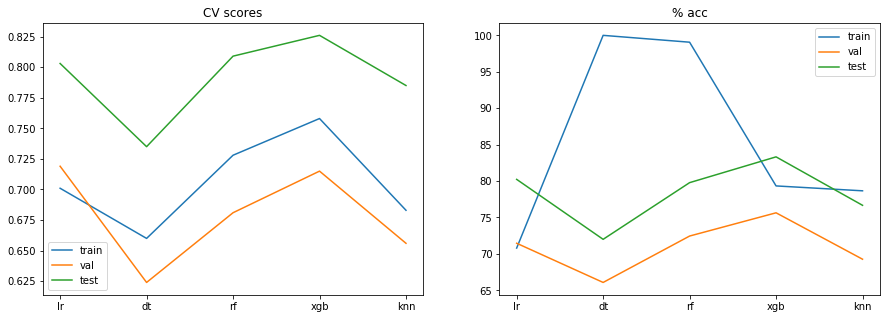

In [162]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('CV scores')
plt.plot(models,cv_score_train_mean,label='train')
plt.plot(models,cv_score_val_mean,label='val')
plt.plot(models,cv_score_test_mean,label='test')
plt.legend()
plt.subplot(1,2,2)
plt.title('% acc')
plt.plot(models,pct_score_train_mean,label='train')
plt.plot(models,pct_score_val_mean,label='val')
plt.plot(models,pct_score_test_mean,label='test')
plt.legend()

# ToDo

1) Try TimeSeriesSplit for CV<br/>
2) Try predict_proba and cumulative sum for probabilities<br/>
3) Try Quantile regression<br/>
4) Try Ordinal regression / mord<br/>
5) Try NN<br/>
6) Try XGB sample_weight (possibly with predict_proba, but it can offset the results - take care)